In [484]:
from modules.read_write import yield_tokens, yield_sentences, write_notes
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [485]:
PATH_TO_SENT_CORPUS = './data/corpus/0comment_sentences_clean.txt'
PATH_TO_TOKENS = './data/corpus/0concept_representation.txt'
PATH_TO_CONCEPTS_AND_SIMILARITIES = './data/corpus/0similarities.txt'
PATH_TO_IMAGES = './data/images/'
PATH_TO_NOTES ='./data/notes/notes.txt'

In [486]:
DPI = 150
# set the dpi globally
mpl.rcParams['figure.dpi'] = DPI

## Description of the preprocessed but unmined Corpus

In [487]:
sent_count = 0
sent_lengths = [] #in chars
avg_sent_length = 0
standard_deviation_sent_lengths = 0
all_video_ids = []
video_id_to_total_char_count = {}
video_id_to_sent_count = {}

for sentence in yield_sentences(PATH_TO_SENT_CORPUS):
    text = sentence['sentence']
    video_id = sentence['video_id']
    all_video_ids.append(video_id)

    sent_count += 1
    sent_length = len( text )
    sent_lengths.append( sent_length )

    if video_id in video_id_to_total_char_count.keys():
        video_id_to_total_char_count[video_id].append(sent_length)
        video_id_to_sent_count[video_id] += 1
    else:
        video_id_to_total_char_count[video_id] = [sent_length]
        video_id_to_sent_count[video_id] = 1 

all_video_ids = set(all_video_ids) 

# stuff I don't use
video_id_to_avg_and_sd = [(
    video_id,
    np.mean(video_id_to_total_char_count[video_id]),
    np.std(video_id_to_sent_count[video_id])
    )for video_id in all_video_ids]

video_id_to_avg_and_sd = sorted(video_id_to_avg_and_sd, key=lambda x:x[1], reverse=True)

#stuff I use
video_id_to_total_chars = [(
    video_id,
    sum(video_id_to_total_char_count[video_id])/sum(sent_lengths)
    )for video_id in all_video_ids]

video_id_to_total_chars = sorted(video_id_to_total_chars, key=lambda x:x[1], reverse=True)



In [488]:
len(all_video_ids)

349

In [489]:
all_video_ids

{'-NyByoFdouw',
 '-m837AvFCOo',
 '-ys_1WBpNNg',
 '03l0ksPHYG4',
 '0Ghd3tvsNAs',
 '0NZgR_KC0RE',
 '0O-Yd705SsY',
 '0Yo8v344eN0',
 '0mqxHZI9tvk',
 '1GYgWy1nqXs',
 '1Q1LWjjRUKs',
 '1QhXNFTRsXI',
 '1QsOmc6m9iU',
 '1qbXsDHZEhk',
 '1sTuHE1IDw8',
 '2439rbfAjqI',
 '24C6a-MLUCg',
 '2JJZik2jZ8o',
 '2KIXNmZiPrQ',
 '2PW-uTsBqRo',
 '2_nhrqcCVdY',
 '31vFJdCfeV8',
 '3OIyTf297I8',
 '3Uw7D5jrw10',
 '3gfAcSF07XE',
 '3j3VL70JpBo',
 '3zINdAGIiaw',
 '4C0HnntHAyM',
 '4DIJQlolVSE',
 '4FoqbJP6uCc',
 '4TzpUd2tbpQ',
 '4WG3Fb3-P_U',
 '5MXm_Uz2px8',
 '5QoaUUISVs4',
 '5SmK00aLqnU',
 '5WS57pNIq9A',
 '5q2xyCmai2I',
 '5qHVQUECG1w',
 '5sjIdENQ-pQ',
 '5slLn629S9c',
 '6Jps-lgNX2Y',
 '6hBF1WZeT_M',
 '6zT8005MBF0',
 '7CIe3AM9Mjg',
 '7Cky6ynvqWM',
 '7HSritifpTI',
 '7TA_9s6T5go',
 '7rmTgREfijY',
 '88YdCmTS3lw',
 '8IVcWQpAQu0',
 '8JxYLdidvuI',
 '8Kxf2HXsiqU',
 '8_B8ekeZTCM',
 '8beftl3VMZY',
 '90jP3v1dpws',
 '9K1pLhXlw_U',
 '9OTMJa4noho',
 '9WK4YL8sOwo',
 '9gEEVfYapNI',
 '9wMjq58Fjvo',
 'A4YeAdyYq4M',
 'A5ORhlX_P7o',
 'A9QO1g

In [490]:
rel_sizes = [vid[1] for vid in video_id_to_total_chars]
mean_rsize = np.mean(rel_sizes)*100
sd_rsize = np.std(rel_sizes)
(mean_rsize, sd_rsize)

(0.28653295128939826, 0.002946403365137303)

In [491]:
avg_sent_length = np.mean(sent_lengths)
standard_deviation_sent_lengths = np.std(sent_lengths)
avg_sent_length, standard_deviation_sent_lengths

(40.53928691181402, 24.984861719657072)

In [492]:
notes = [
    f'## CORPUS DESCRIPTION:',
    f'- The corpus consists of sentences from comments and comment replies under {len(all_video_ids)} different YouTube videos.',
    f'- The corpus consists of a total of {sent_count} sentences.',
    f'- The arithmetic mean of the sentences length measured in characters is {avg_sent_length}. With a standard deviation of {standard_deviation_sent_lengths}.',
    f'- The relative share of each video in the total text corpus is balanced with the average share being {mean_rsize}% with a standard deviation of {sd_rsize}.',
    f'- All characters have been changed to lower case and all html elements have been replaced or removed in the preprocessing.',
]

write_notes(PATH_TO_NOTES, notes)
notes

['## CORPUS DESCRIPTION:',
 '- The corpus consists of sentences from comments and comment replies under 349 different YouTube videos.',
 '- The corpus consists of a total of 8947 sentences.',
 '- The arithmetic mean of the sentences length measured in characters is 40.53928691181402. With a standard deviation of\xa024.984861719657072.',
 '- The relative share of each video in the total text corpus is balanced with the average share being 0.28653295128939826% with a standard deviation of 0.002946403365137303.',
 '- All characters have been changed to lower case and all html elements have been replaced or removed in the preprocessing.']

## Analysis of Concept Occurences, Concept Properties and Concept Relations

In [493]:
all_concept_occurences = [concept for c in yield_tokens(PATH_TO_TOKENS) for concept in c['concepts']]
counter = Counter(all_concept_occurences)
unique_counts = [(concept, count) for concept, count in counter.items()]
sorted_unique_counts = sorted(unique_counts, key=lambda x: x[1], reverse=True)
sorted_unique_counts

[('.', 4921),
 ('i', 1961),
 ('it', 1231),
 ('you', 785),
 ('that', 550),
 ('this', 452),
 ("'s", 420),
 ('?', 417),
 ('me', 367),
 ('the', 336),
 ('this game', 278),
 ('one', 225),
 ('they', 223),
 ('love', 188),
 ('a', 178),
 ('all', 155),
 ('we', 144),
 ('what', 139),
 ('-', 135),
 ('he', 131),
 ('’s', 123),
 ('the game', 120),
 ('good', 100),
 ('*', 97),
 ('lol', 89),
 ('them', 88),
 ('years', 79),
 ('right', 75),
 ('time', 75),
 ('its', 66),
 ('who', 61),
 ('go', 60),
 ('this song', 57),
 ('man', 56),
 ('thanks', 55),
 ('battle', 52),
 ('ost', 51),
 ('something', 49),
 ('oh', 47),
 ('the music', 45),
 (':)', 42),
 ('sounds', 41),
 ('god', 41),
 ('this soundtrack', 41),
 ('hope', 40),
 ('people', 40),
 ('him', 40),
 ('music', 38),
 ('game', 38),
 ('some', 36),
 ('way', 36),
 ('m', 35),
 ('🤣', 33),
 ('a kid', 32),
 ('all time', 32),
 ('which', 30),
 ('route', 30),
 ('s', 29),
 ('fun', 29),
 ('this music', 28),
 ('xd', 28),
 ('bro', 28),
 ('a lot', 27),
 ('a game', 27),
 ('games', 27

In [494]:
import spacy
nlp = spacy.load("en_core_web_lg")

all_concept_occurences = [concept for c in yield_tokens(PATH_TO_TOKENS) for concept in c['concepts']]
all_concept_occurences = [word for word in all_concept_occurences if not nlp.vocab[word].is_stop and word not in ['.','?','!','-','*']] #REMOVE STOPWORDS if necessary
counter = Counter(all_concept_occurences)
unique_counts = [(concept, count) for concept, count in counter.items()]
sorted_unique_counts = sorted(unique_counts, key=lambda x: x[1], reverse=True)
sorted_unique_counts

[('this game', 278),
 ('love', 188),
 ('the game', 120),
 ('good', 100),
 ('lol', 89),
 ('years', 79),
 ('right', 75),
 ('time', 75),
 ('this song', 57),
 ('man', 56),
 ('thanks', 55),
 ('battle', 52),
 ('ost', 51),
 ('oh', 47),
 ('the music', 45),
 (':)', 42),
 ('sounds', 41),
 ('god', 41),
 ('this soundtrack', 41),
 ('hope', 40),
 ('people', 40),
 ('music', 38),
 ('game', 38),
 ('way', 36),
 ('m', 35),
 ('🤣', 33),
 ('a kid', 32),
 ('all time', 32),
 ('route', 30),
 ('s', 29),
 ('fun', 29),
 ('this music', 28),
 ('xd', 28),
 ('bro', 28),
 ('a lot', 27),
 ('a game', 27),
 ('games', 27),
 ('fallout', 26),
 ('x', 26),
 ('use', 25),
 ('the soundtrack', 24),
 ('hit', 23),
 ('stage', 23),
 ('city', 23),
 ('lmao', 23),
 ('live', 22),
 ('u', 22),
 ('theme', 22),
 ('work', 21),
 ('megaman', 21),
 ('my childhood', 21),
 ('help', 21),
 ('pokémon', 21),
 ('my opinion', 20),
 ('yea', 20),
 ('nostalgia', 20),
 ('boss', 20),
 ('haha', 20),
 ('soundtrack', 19),
 ('year', 19),
 ('this comment', 19),
 

In [495]:
counts = [c[1] for c in sorted_unique_counts]
counts

[278,
 188,
 120,
 100,
 89,
 79,
 75,
 75,
 57,
 56,
 55,
 52,
 51,
 47,
 45,
 42,
 41,
 41,
 41,
 40,
 40,
 38,
 38,
 36,
 35,
 33,
 32,
 32,
 30,
 29,
 29,
 28,
 28,
 28,
 27,
 27,
 27,
 26,
 26,
 25,
 24,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 

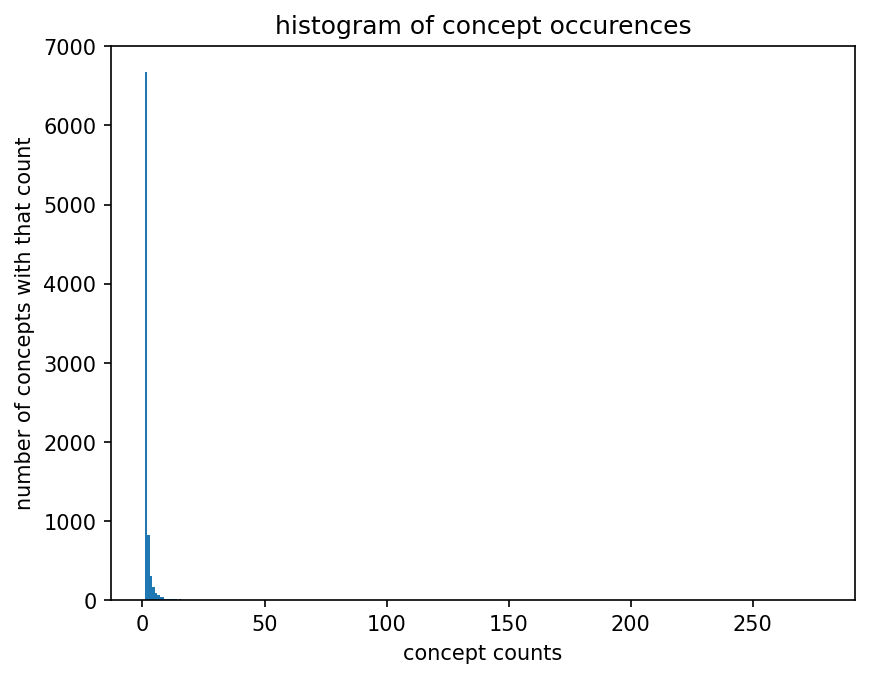

In [496]:
counts = [c[1] for c in sorted_unique_counts]
bins = max(counts) - 1
# create a histogram with 10 bins
n, _, _ = plt.hist(counts, bins=bins)
'''#calculate y-axis tick values
max_freq = np.max(n)
step = max_freq / 5
yticks = np.arange(0, max_freq+step, step)
#set ticks
plt.yticks(yticks)'''
plt.xlabel('concept counts')
plt.ylabel('number of concepts with that count')
plt.title('histogram of concept occurences')

plt.savefig(PATH_TO_IMAGES+f'histogram_of_concept_occurences.png', bbox_inches='tight')
plt.show()

In [497]:
hist, bins = np.histogram(counts, bins=10)
cumulative_hist = np.cumsum(hist)
total = cumulative_hist[-1]
cumulative_hist = cumulative_hist / total

# find the value corresponding to the 75th percentile (Q3) ---> changed to 0.999 percentile
q3_value = np.interp(0.995, cumulative_hist, bins[:-1])

q3_value

1.0

In [498]:
all_concepts = [ concept for concept,_ in sorted_unique_counts ]
q3_concepts = [ (concept, count) for concept, count in sorted_unique_counts ][:30] #if count > q3_value
q3_concepts

[('this game', 278),
 ('love', 188),
 ('the game', 120),
 ('good', 100),
 ('lol', 89),
 ('years', 79),
 ('right', 75),
 ('time', 75),
 ('this song', 57),
 ('man', 56),
 ('thanks', 55),
 ('battle', 52),
 ('ost', 51),
 ('oh', 47),
 ('the music', 45),
 (':)', 42),
 ('sounds', 41),
 ('god', 41),
 ('this soundtrack', 41),
 ('hope', 40),
 ('people', 40),
 ('music', 38),
 ('game', 38),
 ('way', 36),
 ('m', 35),
 ('🤣', 33),
 ('a kid', 32),
 ('all time', 32),
 ('route', 30),
 ('s', 29)]

In [499]:
from gensim.models import Word2Vec
PATH_TO_MODEL_WEIGHTS = './model/0w2v_model.bin'
model = Word2Vec.load(PATH_TO_MODEL_WEIGHTS)

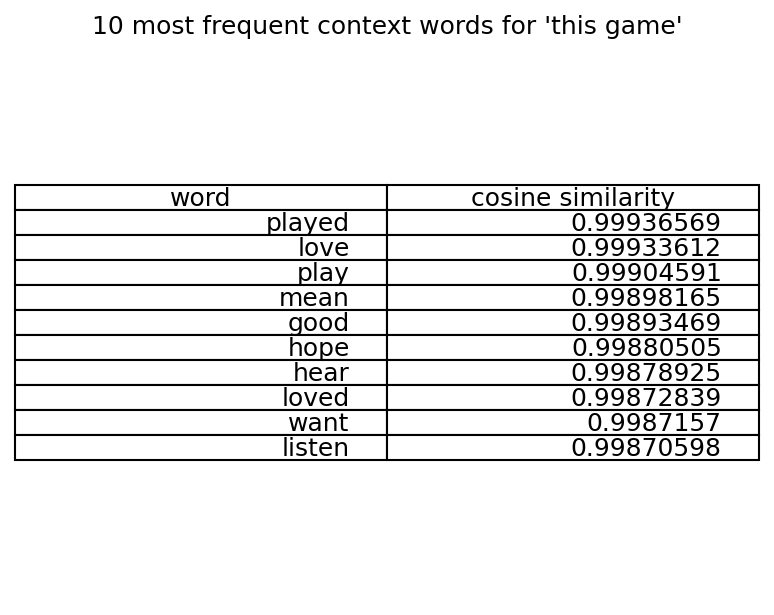

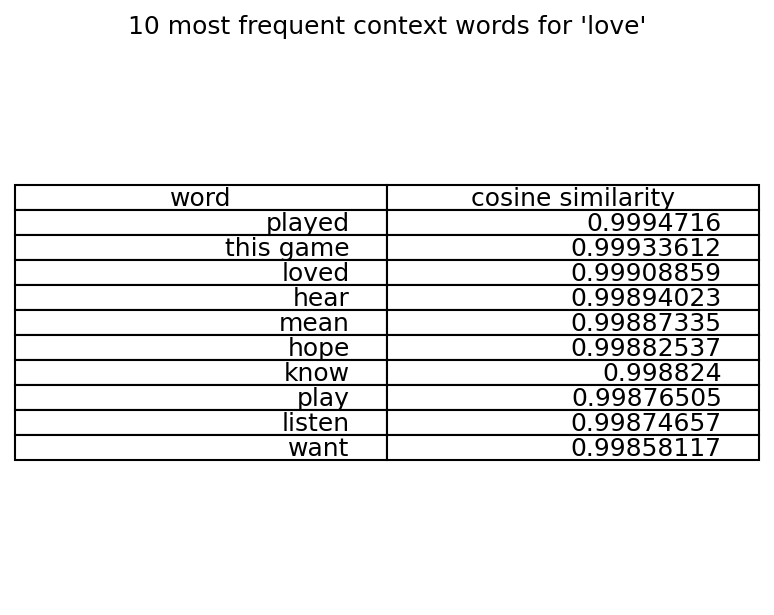

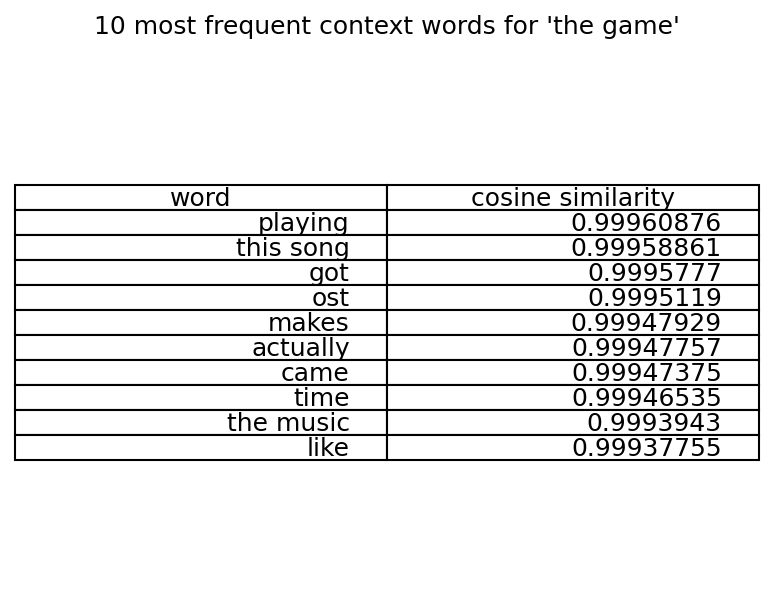

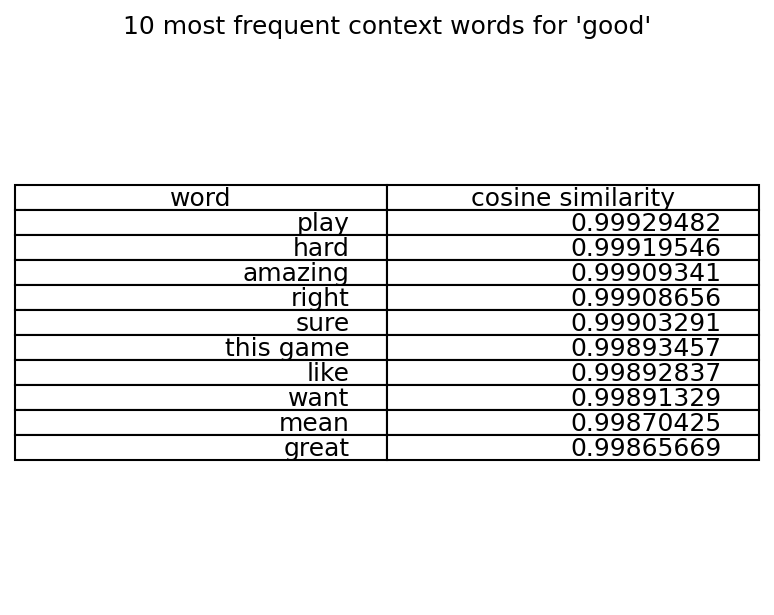

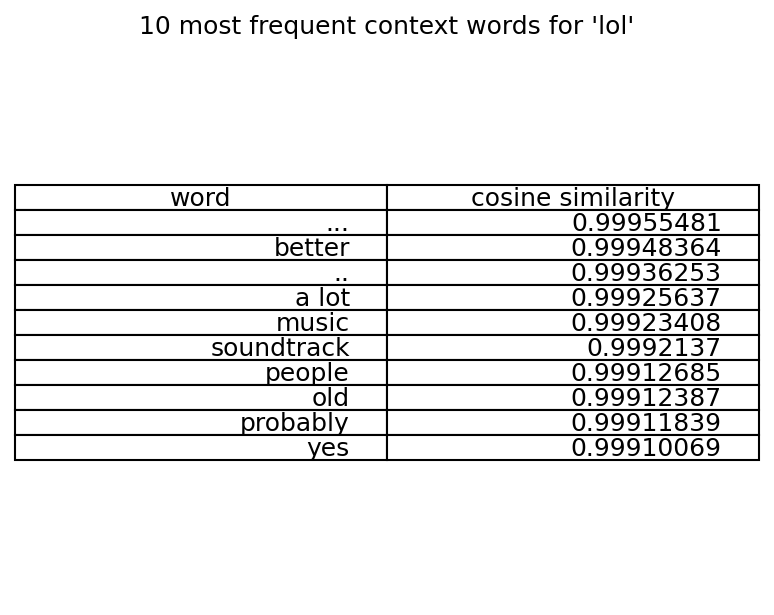

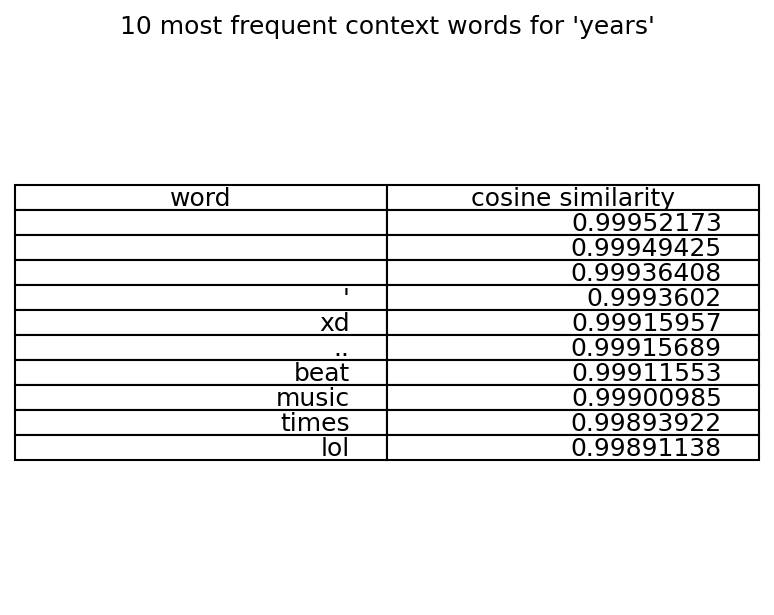

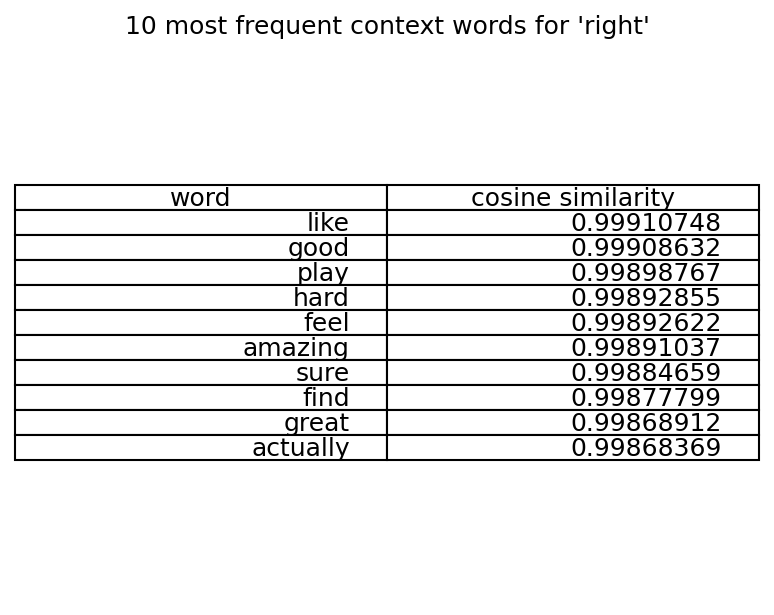

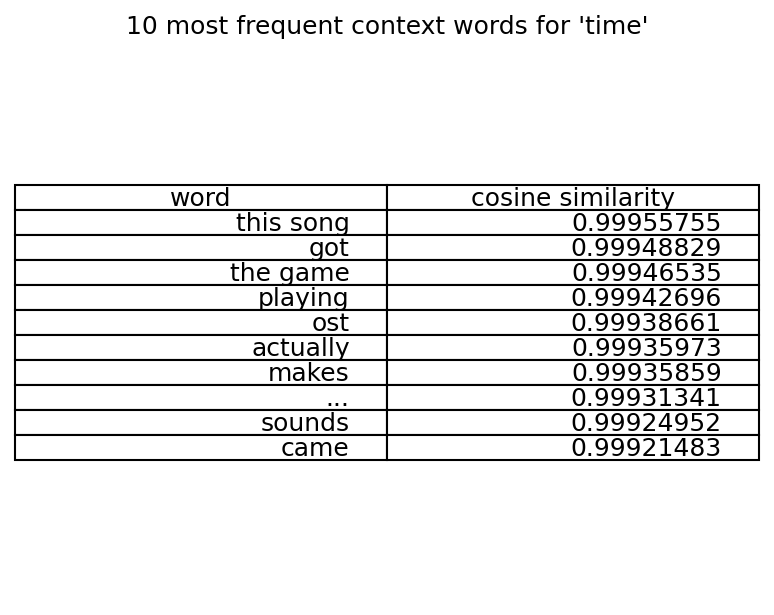

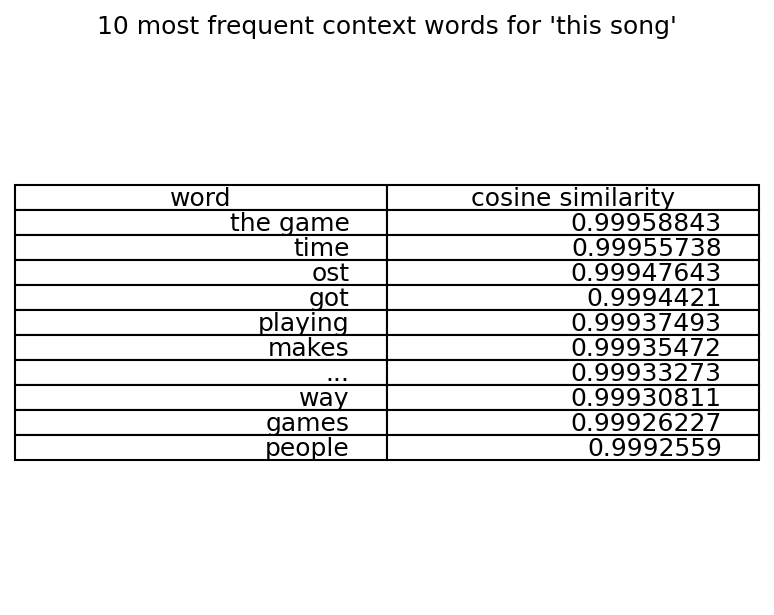

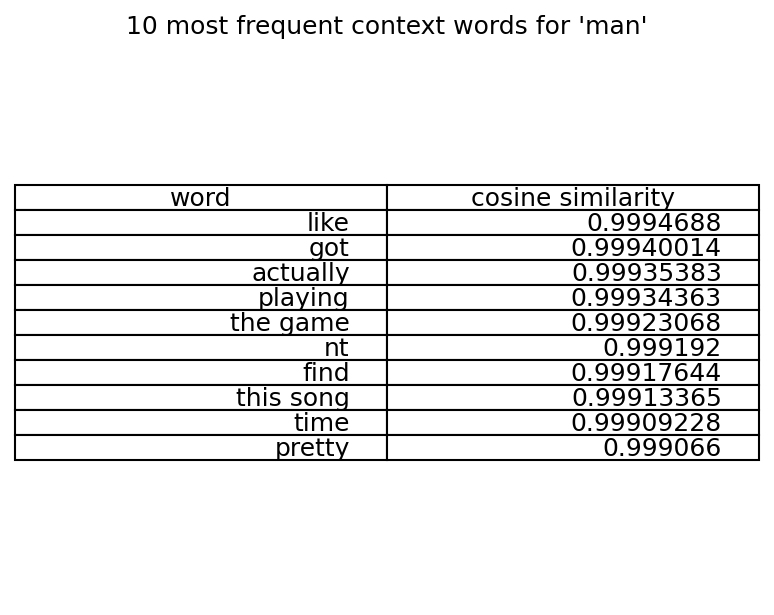

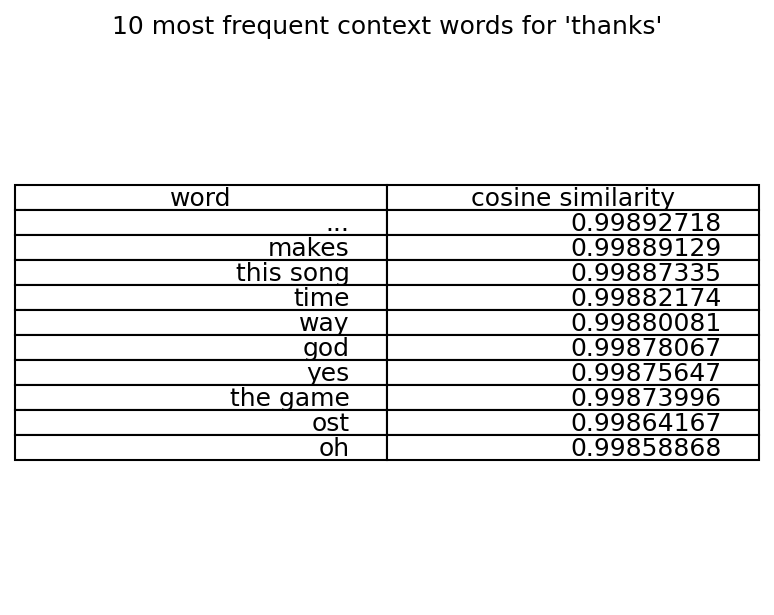

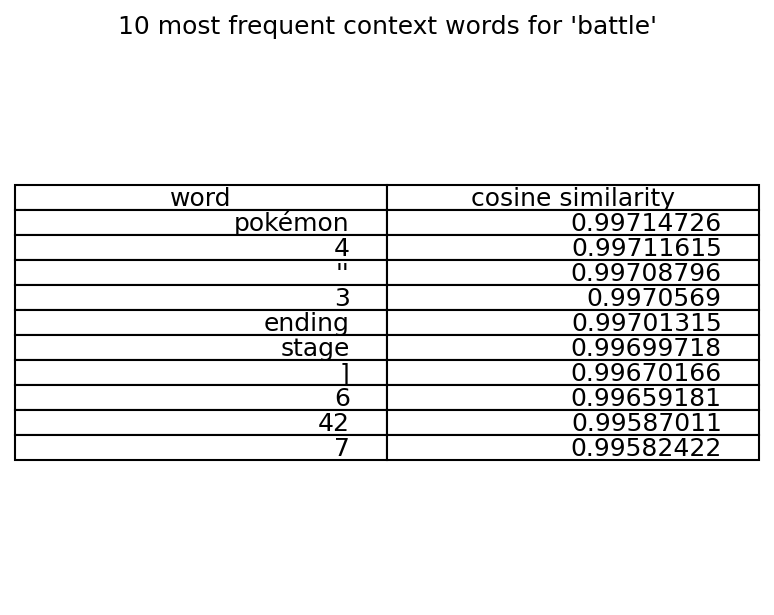

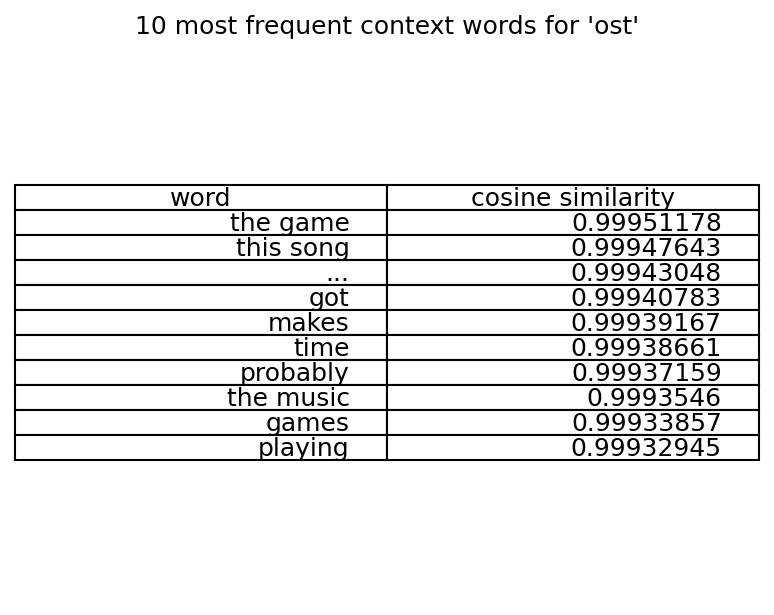

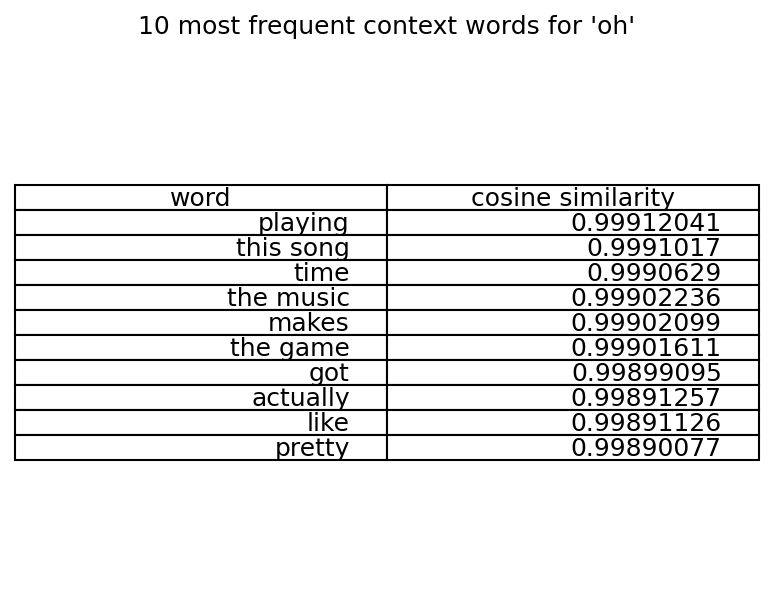

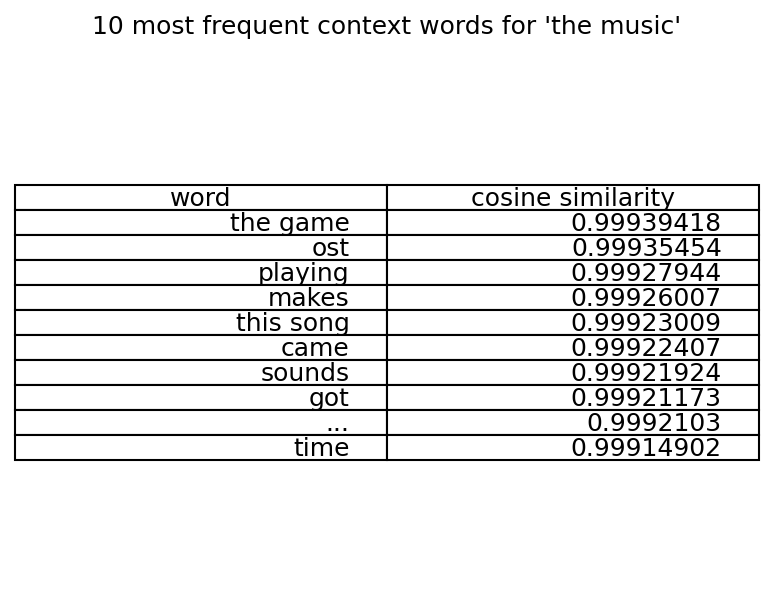

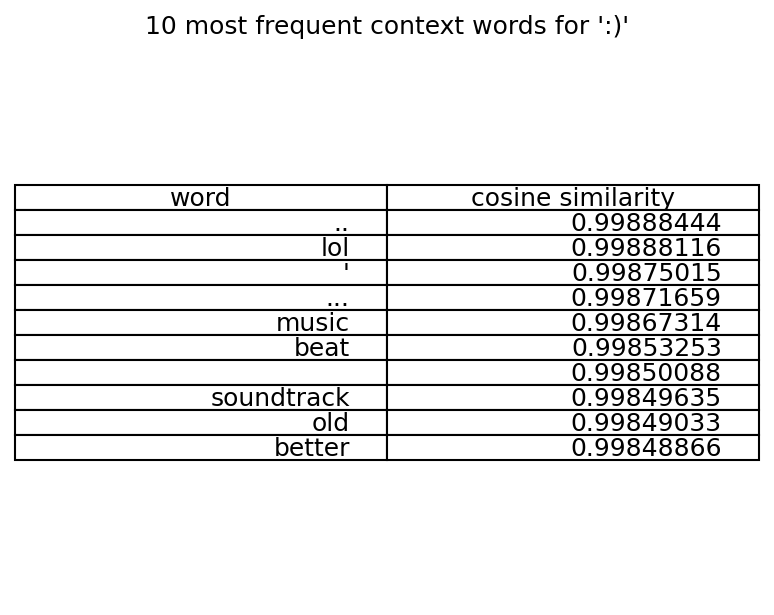

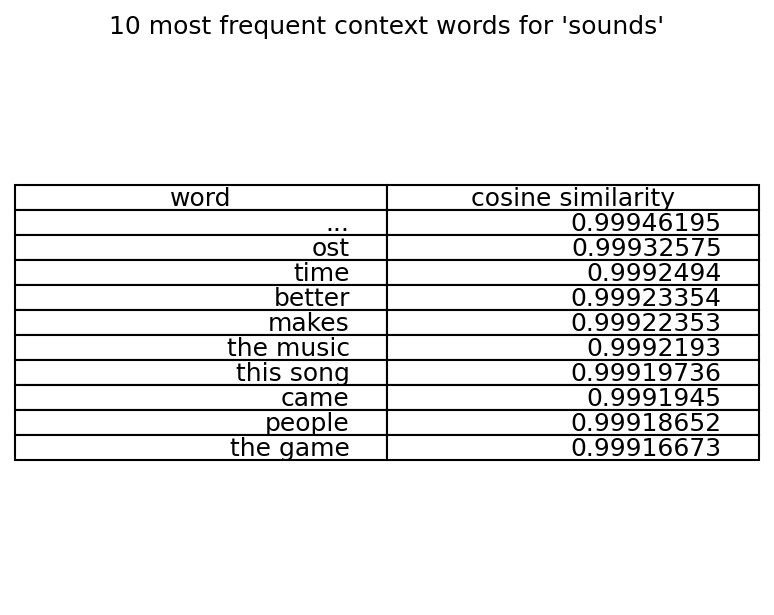

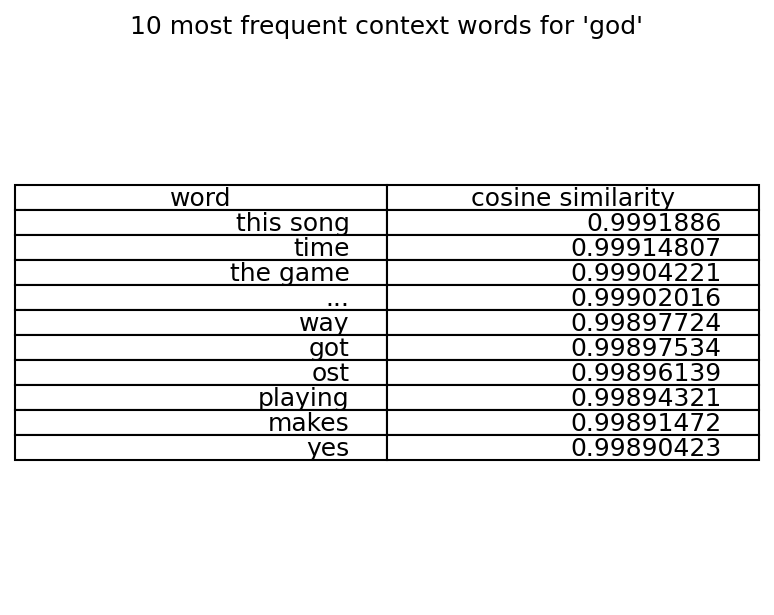

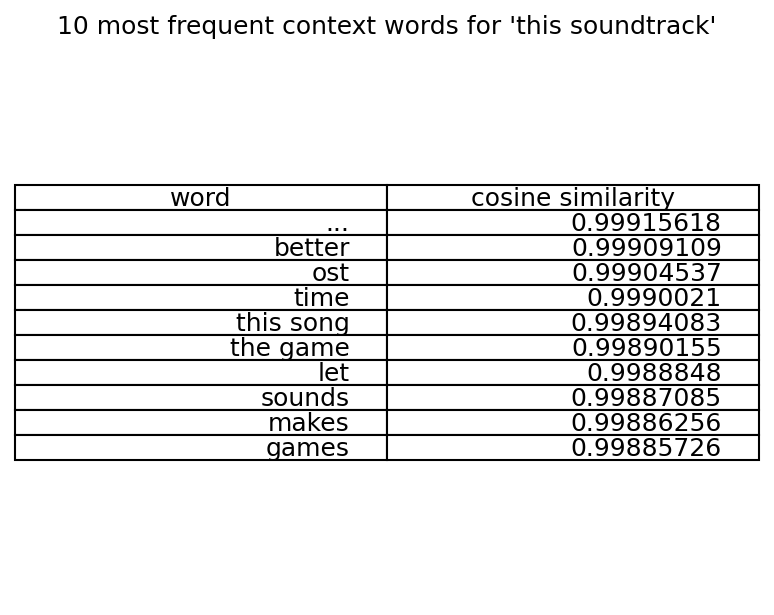

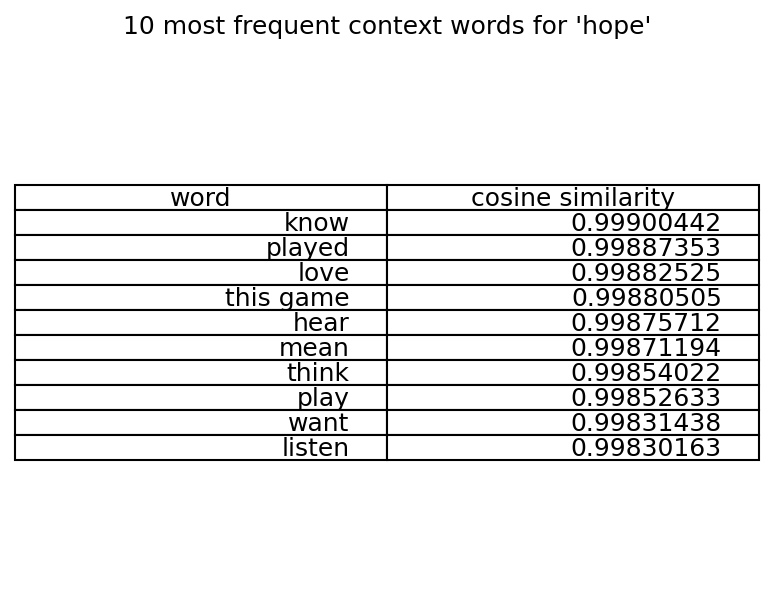

In [500]:
topn = 20
topn_concepts = q3_concepts[:topn]
topn_concepts_to_most_similar_concepts = {}

for topnc,_ in topn_concepts:
    most_sim_nonstop = []
    #most_sim_concepts = [] 
    ms = model.wv.most_similar(topnc,topn=1000)
    c = 0
    while len(most_sim_nonstop)<10:
        w = ms[c][0]
        if not nlp.vocab[w].is_stop and w not in ['.',',','?','!','-','*','"','/',' ']:
            most_sim_nonstop.append(ms[c])
        c += 1
    topn_concepts_to_most_similar_concepts[topnc] = most_sim_nonstop

def most_similar_tables(topn_concept:str,ms_concepts:list):
    #sim_vals = cosine_similarity([topn_concept]+ms_concepts)[0][1:]
    data = [(c,round(sv,8))for c,sv in ms_concepts]
    headers = ["word", "cosine similarity"]
    _, ax = plt.subplots()
    ax.axis("off")
    table = ax.table(cellText=data, colLabels=headers, loc="center")
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    ax.set_title(f"10 most frequent context words for '{topn_concept}'")
    plt.savefig(PATH_TO_IMAGES+f"{topn_concept}_most_sim_table.png", bbox_inches="tight", pad_inches=0.5)

for topn_c,_ in topn_concepts:
    ms_c = topn_concepts_to_most_similar_concepts[topn_c]
    most_similar_tables(topn_c,ms_c )

In [501]:
notes = [
    f'## Concept Data Description:',
    f'- A distinction is made between concepts (ideas, cognigitve representations) and concept representations (lexical elements within a text that refere to concepts).'
    f'- In order to learn something about the concepts of a community, only those concepts representations that are most frequently represented in the comments will be considered further. ',
    f'- It is assumed that concept representations that appear only sporadically in comments are not representative of concepts that are frequently distributed within the community.',
    f'- Therefor the upper quantile of the frequency distribution of the concept representations is determined (Q3 = {q3_value}).',
    f'- Only concept representations that occur more frequently than 75% of all concept representations will be considered further in the project work.'
]

write_notes(PATH_TO_NOTES, notes)
notes

['## Concept Data Description:',
 '- A distinction is made between concepts (ideas, cognigitve representations) and concept representations (lexical elements within a text that refere to concepts).- In order to learn something about the concepts of a community, only those concepts representations that are most frequently represented in the comments will be considered further. ',
 '- It is assumed that concept representations that appear only sporadically in comments are not representative of concepts that are frequently distributed within the community.',
 '- Therefor the upper quantile of the frequency distribution of the concept representations is determined (Q3 = 1.0).',
 '- Only concept representations that occur more frequently than 75% of all concept representations will be considered further in the project work.']

In [502]:
#sentinment per highfreq concept -> value connotation
#clustering based on network analysis -> network of highfreq_concepts and their top 20 most similar/most contextual concepts (SIMILARITY NEIGHBORHOOD)

## Concept Relations

In [503]:
import networkx as nx
from scipy.signal import find_peaks
from scipy.stats import gaussian_kde
import matplotlib.colors as mcolors


In [504]:
concepts = [c[0] for c in q3_concepts]
embeddings = [model.wv[c] for c in concepts]
similarity_matrix = cosine_similarity(embeddings)

In [505]:
sm_1dim = similarity_matrix.flatten()
maxima_to_find = 3
_, bins = np.histogram(sm_1dim, bins=20, range=(-1, 1), density=True)
kde = gaussian_kde(sm_1dim)
density = kde(sm_1dim)
peaks, _ = find_peaks(density, distance=1)
peaks = [p for p in peaks]
maxima = sm_1dim[peaks][:maxima_to_find]
maxima

array([0.99555784, 0.99808234, 0.99639255], dtype=float32)

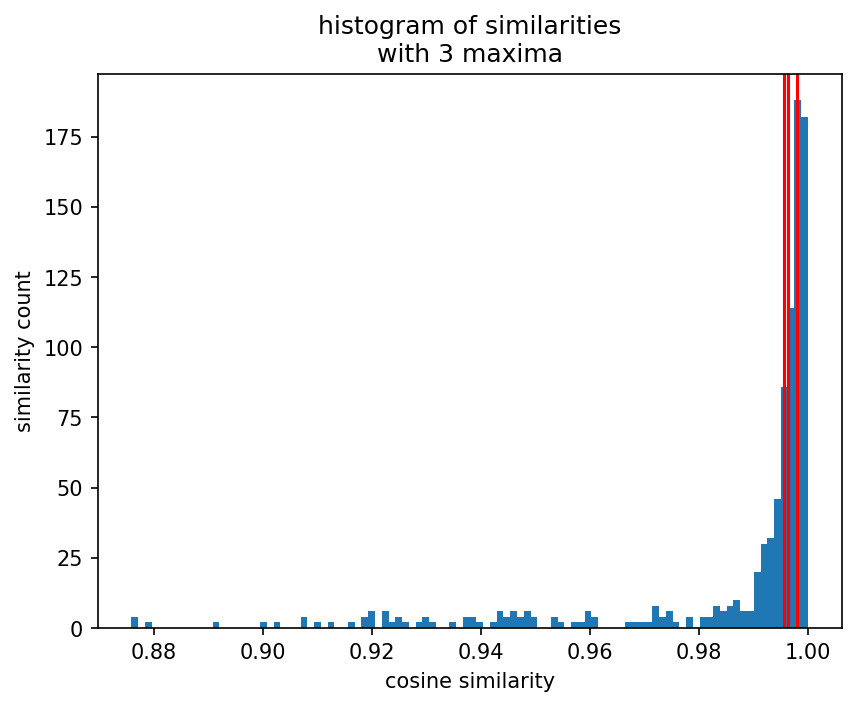

In [506]:
bins = 100
# create a histogram with 10 bins
n, _, _ = plt.hist(sm_1dim, bins=bins)
'''#calculate y-axis tick values
max_freq = np.max(n)
step = max_freq / 5
yticks = np.arange(0, max_freq+step, step)
#set ticks
plt.yticks(yticks)'''
#xticks = np.arange(-1, 1.2, 0.2)
#plt.xticks(xticks)
for max_point in maxima:
    plt.axvline(max_point, color='r')
# add labels and title
plt.xlabel('cosine similarity')
plt.ylabel('similarity count')
plt.title('histogram of similarities\nwith 3 maxima')

plt.savefig(PATH_TO_IMAGES+f'histogram_of_similarities.png', bbox_inches='tight')
plt.show()

In [507]:
def define_graph(label:str, maxima:list[float]):
    
    G = nx.Graph()
    G.add_nodes_from(concepts)

    max_low,max_mid,max_high = maxima
    for i, concept_a in enumerate(concepts):
        for j, concept_b in enumerate(concepts):
            if i < j:
                similarity = similarity_matrix[i][j]
                l = ['S1', 'S2', 'S3', 'S4'][sum([similarity < max_low, similarity < max_mid, similarity < max_high])]
                if l == label:
                    G.add_edge(
                        concept_a,
                        concept_b,
                        weight=similarity,
                        label= l)
    isolates = list(nx.isolates(G))
    G.remove_nodes_from(isolates)
    return(G)

In [515]:
light_grey = (0.8, 0.8, 0.8)
dark_grey = (0.1, 0.1, 0.1)
colors = [light_grey, dark_grey]
cmap = mcolors.ListedColormap(colors)

def draw_graph(graph, label:str):

    edge_colors = [graph[u][v]['weight'] for u,v in graph.edges()]
    pos = nx.nx_pydot.graphviz_layout(graph) #nx.spring_layout(graph)
    nx.draw(
        graph,
        pos=pos,
        with_labels=True,
        node_color = 'lightgrey',
        edge_color = edge_colors,
        font_size=6,
        font_weight='regular',
        width=1,
        edge_cmap=cmap)
    plt.savefig(PATH_TO_IMAGES+f'{label}.png', dpi=2000)

In [516]:
maxima = maxima

In [517]:
l = 'S1'
g = define_graph(l,maxima)
draw_graph(g,l)


/var/folders/xk/lhvl51bd263f14hqvkcgzmlh0000gn/T/ipykernel_1567/2435926269.py:12: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos=nx.nx_pydot.graphviz_layout(graph),


ValueError: Node names and attributes should not contain ":" unless they are quoted with "".                For example the string 'attribute:data1' should be written as '"attribute:data1"'.                Please refer https://github.com/pydot/pydot/issues/258

/var/folders/xk/lhvl51bd263f14hqvkcgzmlh0000gn/T/ipykernel_1567/3278462132.py:20: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  plt.savefig(PATH_TO_IMAGES+f'{label}.png', dpi=2000)
/Users/niclashagele/Documents/Code/CommunityConceptAnalysis/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


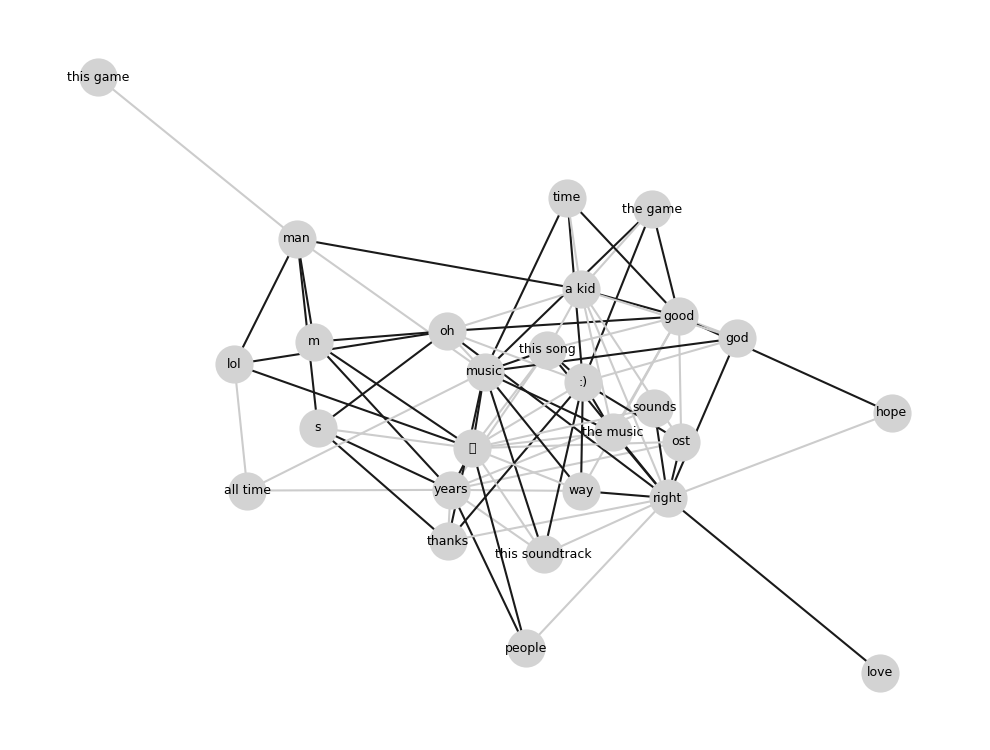

In [511]:
l = 'S2'
g = define_graph(l,maxima)
draw_graph(g,l)

/var/folders/xk/lhvl51bd263f14hqvkcgzmlh0000gn/T/ipykernel_1567/3278462132.py:20: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  plt.savefig(PATH_TO_IMAGES+f'{label}.png', dpi=2000)


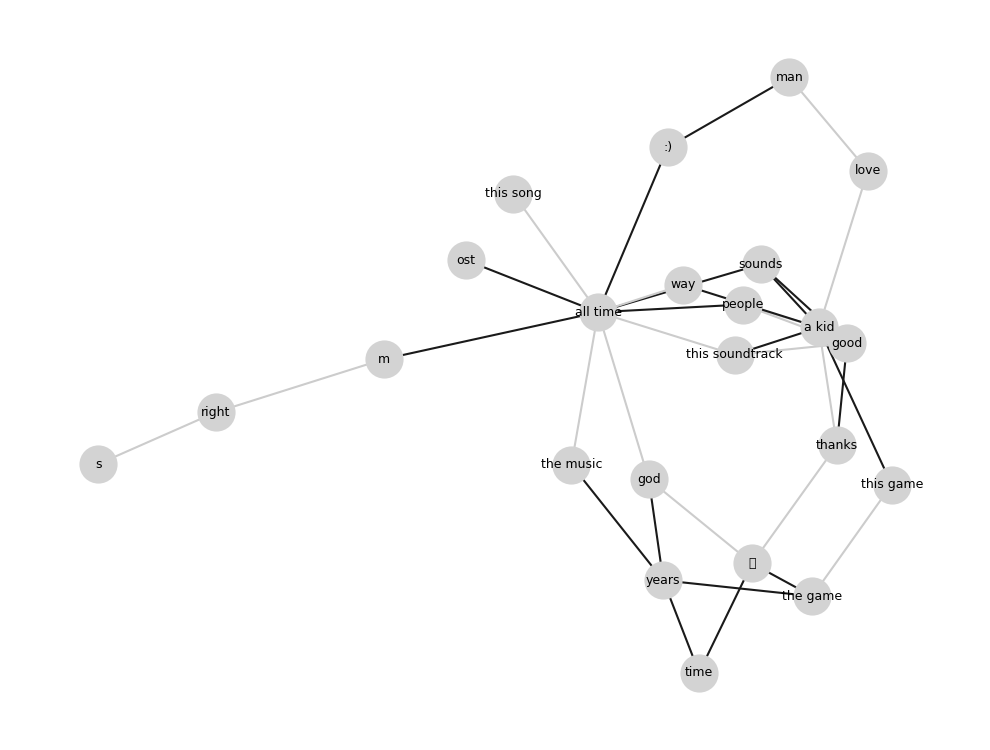

In [512]:
l = 'S3'
g = define_graph(l,maxima)
draw_graph(g,l)

/var/folders/xk/lhvl51bd263f14hqvkcgzmlh0000gn/T/ipykernel_1567/3278462132.py:20: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  plt.savefig(PATH_TO_IMAGES+f'{label}.png', dpi=2000)


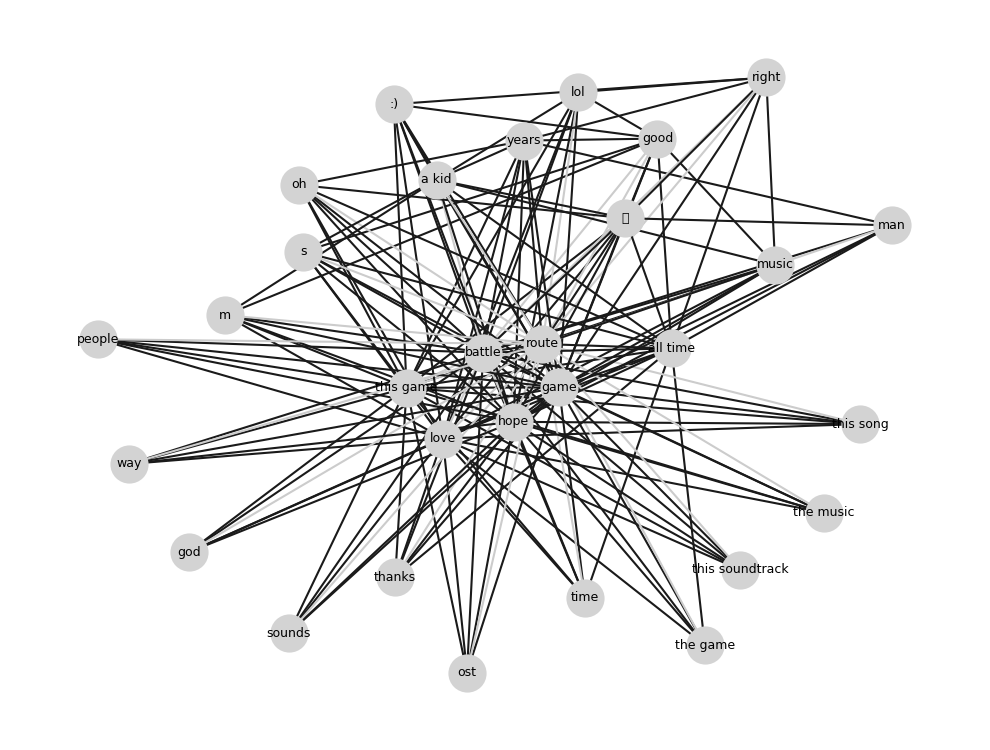

In [513]:
l = 'S4'
g = define_graph(l,maxima)
draw_graph(g,l)